## Preparación del DataSet Medición de la Calidad del Aire Oriente Antiqueño

In [2]:
# Tratamiento de Datos
#=======================================================
import pandas as pd
import numpy as np

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt


# Preparación de Datos
from sklearn.impute import KNNImputer

#### Cargue del DataSet
Se tienen datos metereologicos del oriente antioqueño de la estacion San Antonio de Pereira respecto a los años 2023 y 2024, proporcinados por CORNARE

| Campo | Descripción | Ejempo |
| :--- | :--- |:--- |
| Estación | Estacion donde se realiza la medicion  | San Antonio de Pereira |
| Fecha inicial | Fecha y hora de inicio  de registro  | 01/01/2024 01:00|
| Fecha inicial | Fecha y hora de fin de registro  | 01/01/2024 01:59|
| P | Presión atmosférica medida|591.8  |
| CO | Concentración de monóxido de carbono (CO) | 619.8 |
| NO| Concentración de dióxido de nitrógeno (NO₂)|6.4 |
| O3 |Concentración de ozono (O₃)  | 40.7 |
| PM2.5| Partículas en suspensión de tamaño menor a 2.5 micras (PM2.5)  | 8.3 |
| PM10| Partículas en suspensión de tamaño menor a 10 micras (PM10)  | 8.3|
| DViento | Dirección del viento. |202.5 |
| HAire10 | HAire10: Humedad del aire (a 10 metros de altura) | 91.0 |
| PLiquida | Precipitación líquida o cantidad de lluvia | 0.25 |
| RGolbal  | Radiación solar global |1.8  |
| TAire10| Temperatura del aire (a 10 metros de altura)  | 17.3 |
| Vviento | Velocidad del viento  |  0.9|
| SO2| Concentración de dióxido de azufre (SO₂)  | 0.9|


Se cuentan con dos  archivos CSV con informacion de los años 2023 y 2024 con datos medidos bajo las variables anteriores

In [3]:


df2023=pd.read_csv('https://raw.githubusercontent.com/dmorasu/Data_monografia_udea/refs/heads/main/2023.csv')
df2024=pd.read_csv('https://raw.githubusercontent.com/dmorasu/Data_monografia_udea/refs/heads/main/2024.csv')


 ### Exploracion de los Datos
Realizamos a explorar los datos contienen los archivos mediantea DataSet

In [4]:
print(df2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48209 entries, 0 to 48208
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estacion       48209 non-null  object 
 1   Fecha inicial  48209 non-null  object 
 2   Fecha final    48209 non-null  object 
 3   P              3898 non-null   float64
 4   CO             3914 non-null   float64
 5   NO2            3028 non-null   float64
 6   O3             3951 non-null   float64
 7   PM10           3924 non-null   float64
 8   PM2.5          3924 non-null   float64
 9   DViento        3949 non-null   float64
 10  HAire10        3973 non-null   float64
 11  PLiquida       4055 non-null   float64
 12  RGlobal        3997 non-null   float64
 13  TAire10        4041 non-null   float64
 14  VViento        4055 non-null   float64
 15  SO2            1500 non-null   float64
dtypes: float64(13), object(3)
memory usage: 5.9+ MB
None


In [5]:
df2023.head(5)

,Estacion,Fecha inicial,Fecha final,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
0,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17 23:00,2023-11-17 23:59,591.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17 22:59,2023-11-17 23:59,NaN,619.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17 22:59,2023-11-17 23:59,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17 22:59,2023-11-17 23:59,NaN,NaN,NaN,40.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2023-11-17 22:59,2023-11-17 23:59,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2024.head(5)

,Estacion,Fecha inicial,Fecha final,CO,NO2,O3,PM10,PM2.5,SO2,DViento,HAire10,P,PLiquida,RGlobal,TAire10,VViento
0,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2024-09-01 23:00,2024-09-01 23:59,596.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2024-09-01 23:00,2024-09-01 23:59,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2024-09-01 23:00,2024-09-01 23:59,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2024-09-01 23:00,2024-09-01 23:59,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SAN ANTONIO DE PEREIRA MONITOREO CONTINUO,2024-09-01 23:00,2024-09-01 23:59,NaN,NaN,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2023.columns

Index(['Estacion', 'Fecha inicial', 'Fecha final', 'P', 'CO', 'NO2', 'O3',
       'PM10', 'PM2.5', 'DViento', 'HAire10', 'PLiquida', 'RGlobal', 'TAire10',
       'VViento', 'SO2'],
      dtype='object')

In [8]:
df2024.columns

Index(['Estacion', 'Fecha inicial', 'Fecha final', 'CO', 'NO2', 'O3', 'PM10',
       'PM2.5', 'SO2', 'DViento', 'HAire10', 'P', 'PLiquida', 'RGlobal',
       'TAire10', 'VViento'],
      dtype='object')

#### Como los datos solo contienen datos de una estacion procederemos a eliminar la columna estacion y la columna fecha fina dado que solo tomaremos el registro de hora para manejar una granularidad de los datos mas detallada


In [29]:
"""     funcion depurar  columnas elimina la columna estacion,fecha finaly 
        conviernte fecha inicia en tipo DataTime.
        argumentos: 
        In[0]:DataSet
        Out[0[:DataSet
"""
def depurarColumnas(df):
    df['Fecha inicial']=pd.to_datetime(df['Fecha inicial'])
    df=df.drop(columns=['Estacion','Fecha final'])
    return df


In [30]:
# Se agrupan por fecha y hora los dataset de cada año
df1=depurarColumnas(df2023)
df2=depurarColumnas(df2024)


In [32]:
df1

,Fecha inicial,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
0,2023-11-17 23:00:00,591.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-17 22:59:00,NaN,619.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-17 22:59:00,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-11-17 22:59:00,NaN,NaN,NaN,40.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-17 22:59:00,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48204,2023-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
48205,2023-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN
48206,2023-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
48207,2023-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,NaN,NaN


In [38]:
df1.columns


Index(['Fecha inicial', 'P', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'DViento',
       'HAire10', 'PLiquida', 'RGlobal', 'TAire10', 'VViento', 'SO2'],
      dtype='object')

In [39]:
df2

,Fecha inicial,CO,NO2,O3,PM10,PM2.5,SO2,DViento,HAire10,P,PLiquida,RGlobal,TAire10,VViento
0,2024-09-01 23:00:00,596.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-01 23:00:00,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-01 23:00:00,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-01 23:00:00,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-01 23:00:00,NaN,NaN,NaN,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56048,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595.2,NaN,NaN,NaN,NaN
56049,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
56050,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
56051,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN


In [40]:
df1.shape

(48209, 14)

In [41]:
df2.shape

(56053, 14)

In [42]:
df=pd.concat([df1,df2])
df

,Fecha inicial,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
0,2023-11-17 23:00:00,591.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-17 22:59:00,NaN,619.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-17 22:59:00,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-11-17 22:59:00,NaN,NaN,NaN,40.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-17 22:59:00,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56048,2024-03-06 00:00:00,595.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56049,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
56050,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
56051,2024-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,NaN


##### Se almacena el dataSet unificado

In [43]:

df.to_csv('./dataseminario/Data/daDatosOrienteAntioqueno.csv')

### Visualizacíon de Datos

El DataSet solo cuenta con variables numericas, para este caso.

In [46]:
#En listamos las variables númericas:
variablesNum=df.select_dtypes(include=['float64']).columns
df[variablesNum].head(2)

,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
0,591.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,619.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observamos la Distribución de los datos para cada una de las viariables

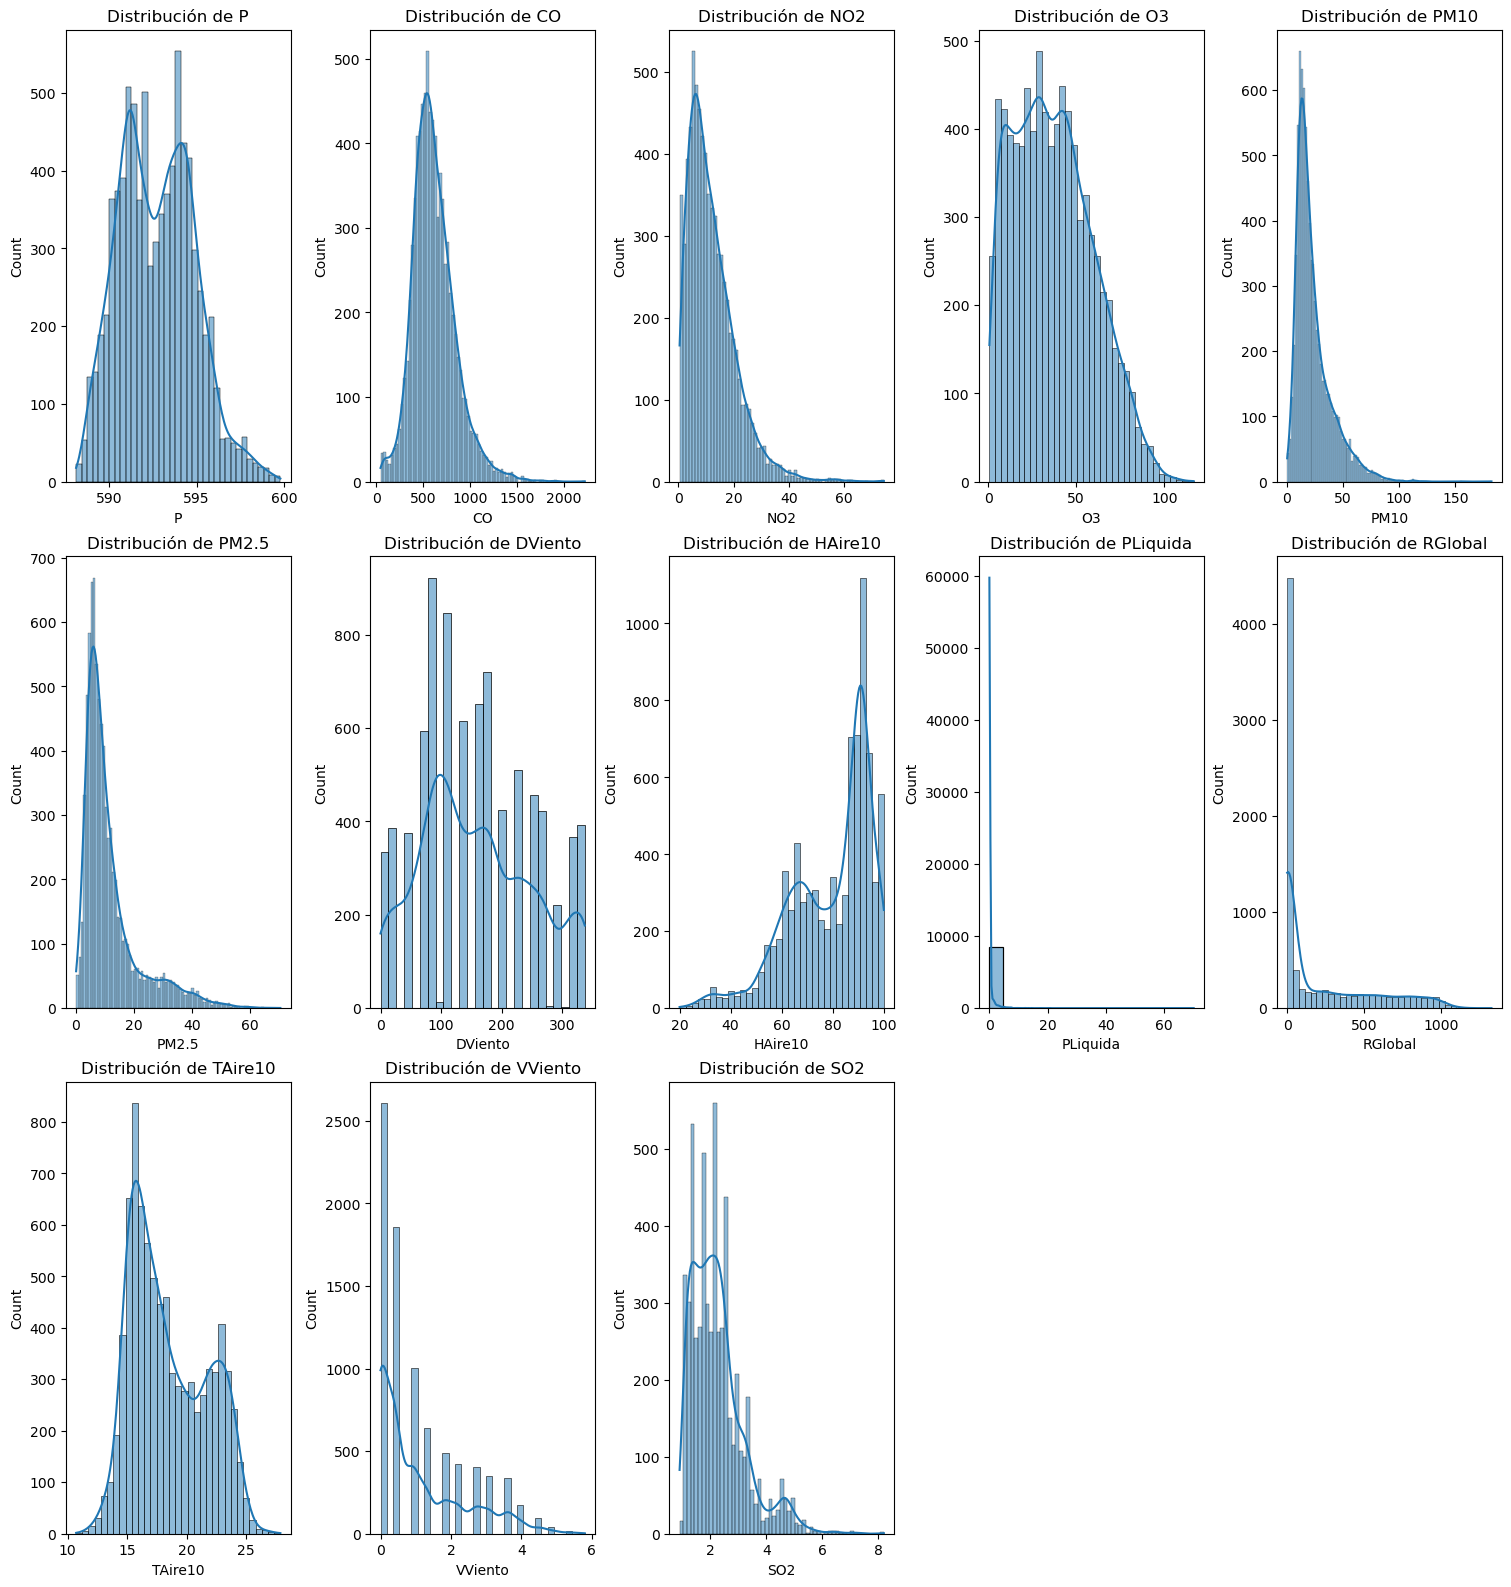

In [47]:
numColumnas = 3  # Número de columnas en la cuadrícula
numFilas = (len(variablesNum) + numColumnas - 1) // numColumnas # Determinamos el número de filas necesario

fig, axes = plt.subplots(numFilas, numFilas, figsize=(15, 5 * numFilas), constrained_layout=True)
axes = axes.flatten()
for i, columna in enumerate(variablesNum):
    sns.histplot(df[columna], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {columna}", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.show()

## Preparación de los Datos

#### Datos Nulos -->Procederemos a identificar la cantidad de datos nulos de nuestro DataSet

In [49]:
df.isnull().sum()

Fecha inicial        0
P                95981
CO               96089
NO2              97093
O3               95926
PM10             96178
PM2.5            96178
DViento          95998
HAire10          95964
PLiquida         95625
RGlobal          95917
TAire10          95834
VViento          95821
SO2              98540
dtype: int64

Como se identifican varios registros nulos en toda las columnas procedemores  aplicar la tecnica de KNN para imputadar dichos datos, no se obta por eliminar estos datos nulos dado que estan en menor cuantia y reduciria la muestra considerablemente


### Imputacion de Valores nulos


In [50]:
imputer=KNNImputer(n_neighbors=5)
dfImputado=imputer.fit_transform(dfLimpio[variablesNum])
dfImputado=pd.DataFrame(dfImputado,columns=variablesNum)
dfImputado

,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
0,592.84,675.82,10.72,22.20,25.24,16.56,202.5,91.0,0.250,49.4,14.8,0.50,1.82
1,592.48,611.52,10.46,28.42,8.88,5.50,247.5,91.0,3.856,49.2,14.7,0.90,2.20
2,592.84,675.82,10.72,22.20,25.24,16.56,270.0,91.0,3.038,47.4,14.8,0.40,2.26
3,593.44,400.56,6.90,29.48,12.96,7.74,45.0,91.0,9.396,33.6,14.7,0.78,2.04
4,591.26,641.10,7.14,30.10,12.32,6.12,67.5,91.0,0.250,46.6,14.6,0.60,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,594.50,1051.40,22.70,43.10,28.10,19.90,225.0,63.0,0.400,278.0,18.2,0.90,1.60
9062,594.90,785.90,21.30,36.50,26.40,19.70,292.5,67.0,0.200,208.8,17.0,0.40,1.40
9063,595.30,768.90,22.80,21.10,23.70,16.90,135.0,68.0,1.800,401.2,16.7,0.40,1.40
9064,595.40,643.10,12.80,37.40,23.00,16.90,247.5,70.0,2.800,395.2,15.8,0.40,1.10


##### Verificamos que  la imputacion sea acertada y no tengamos datos nulos 

In [26]:
dfImputado.describe()

,P,CO,NO2,O3,PM10,PM2.5,DViento,HAire10,PLiquida,RGlobal,TAire10,VViento,SO2
count,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.000000,9066.00000
mean,605.274591,631.297931,11.955264,38.238462,23.771138,12.007033,169.695814,81.201302,2.404411,297.683477,18.850066,1.396031,2.70677
std,85.491264,236.564230,8.496679,22.144148,15.667875,9.649361,90.390776,20.536907,2.577052,287.195553,4.025642,1.103401,1.24497
min,588.100000,46.300000,0.400000,0.700000,0.400000,0.200000,22.500000,20.000000,0.100000,1.000000,10.700000,0.400000,0.90000
25%,591.100000,475.325000,6.000000,20.800000,13.000000,5.800000,90.000000,69.000000,1.000000,66.000000,16.000000,0.500000,1.70000
50%,592.600000,604.300000,10.060000,36.500000,19.300000,8.740000,157.500000,84.000000,1.600000,201.300000,18.000000,0.900000,2.32000
75%,594.300000,755.800000,15.800000,53.400000,29.900000,14.215000,225.000000,91.000000,3.220000,459.800000,21.300000,1.800000,3.70000
max,1190.200000,2224.100000,74.500000,153.200000,182.100000,70.500000,675.000000,200.000000,70.200000,2196.000000,50.000000,10.800000,9.40000


In [51]:
#Idenficamos  que no queden valores nulos luego de la imputacion

for col in dfImputado.columns:
    print (col, np.sum(pd.isnull(dfImputado[col])))

P 0
CO 0
NO2 0
O3 0
PM10 0
PM2.5 0
DViento 0
HAire10 0
PLiquida 0
RGlobal 0
TAire10 0
VViento 0
SO2 0


In [54]:
dfImputado.isnull().sum()

P           0
CO          0
NO2         0
O3          0
PM10        0
PM2.5       0
DViento     0
HAire10     0
PLiquida    0
RGlobal     0
TAire10     0
VViento     0
SO2         0
dtype: int64

In [55]:

df.to_csv('./dataseminario/Data/DataSetImputados.csv')